# Tractor Sales - Time Forecasting Case Study

In [136]:
#import the important packages
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

In [137]:
sales = pd.read_csv('Tractor-Sales.csv')
sales

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203
...,...,...
139,Aug-14,848
140,Sep-14,640
141,Oct-14,581
142,Nov-14,519


In [138]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Month-Year              144 non-null    object
 1   Number of Tractor Sold  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [139]:
sales.columns = ['Month_Year', 'No_of_Tractors_Sold']

In [140]:
#converting the object type date to datetime type
sales['Month_Year'] = pd.to_datetime(sales.Month_Year, format='%b-%y')

In [141]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Month_Year           144 non-null    datetime64[ns]
 1   No_of_Tractors_Sold  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


**Setting the time data column as the index.**

In [142]:
sales.set_index(sales.Month_Year, inplace=True)

In [143]:
sales

,Month_Year,No_of_Tractors_Sold
Month_Year,,
2003-01-01,2003-01-01,141
2003-02-01,2003-02-01,157
2003-03-01,2003-03-01,185
2003-04-01,2003-04-01,199
2003-05-01,2003-05-01,203
...,...,...
2014-08-01,2014-08-01,848
2014-09-01,2014-09-01,640
2014-10-01,2014-10-01,581


In [144]:
sales['year'] = sales.Month_Year.dt.year
sales['month'] = sales.Month_Year.dt.month

In [145]:
sales

,Month_Year,No_of_Tractors_Sold,year,month
Month_Year,,,,
2003-01-01,2003-01-01,141,2003,1
2003-02-01,2003-02-01,157,2003,2
2003-03-01,2003-03-01,185,2003,3
2003-04-01,2003-04-01,199,2003,4
2003-05-01,2003-05-01,203,2003,5
...,...,...,...,...
2014-08-01,2014-08-01,848,2014,8
2014-09-01,2014-09-01,640,2014,9
2014-10-01,2014-10-01,581,2014,10


In [146]:
Tractors = sales.No_of_Tractors_Sold
Tractors

Month_Year
2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Name: No_of_Tractors_Sold, Length: 144, dtype: int64

In [147]:
type(Tractors)

pandas.core.series.Series

<AxesSubplot:xlabel='Month_Year'>

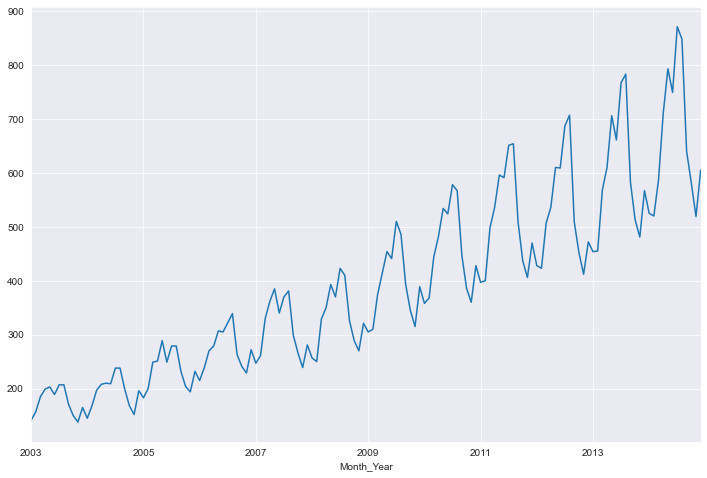

In [148]:
Tractors.plot(figsize = (12,8))

**We can see that the time series data we have contains an increasing trend and also the month over month seasonality.**

# Checking the trend in the Time Series data.

In [149]:
pd.pivot_table(data = sales, index = 'year', columns = 'month', values = 'No_of_Tractors_Sold')

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2003,141,157,185,199,203,189,207,207,171,150,138,165
2004,145,168,197,208,210,209,238,238,199,168,152,196
2005,183,200,249,251,289,249,279,279,232,204,194,232
2006,215,239,270,279,307,305,322,339,263,241,229,272
2007,247,261,330,362,385,340,370,381,299,266,239,281
2008,257,250,329,350,393,370,423,410,326,289,270,321
2009,305,310,374,414,454,441,510,486,393,345,315,389
2010,358,368,444,482,534,524,578,567,447,386,360,428
2011,397,400,498,536,596,591,651,654,509,437,406,470


<AxesSubplot:xlabel='year'>

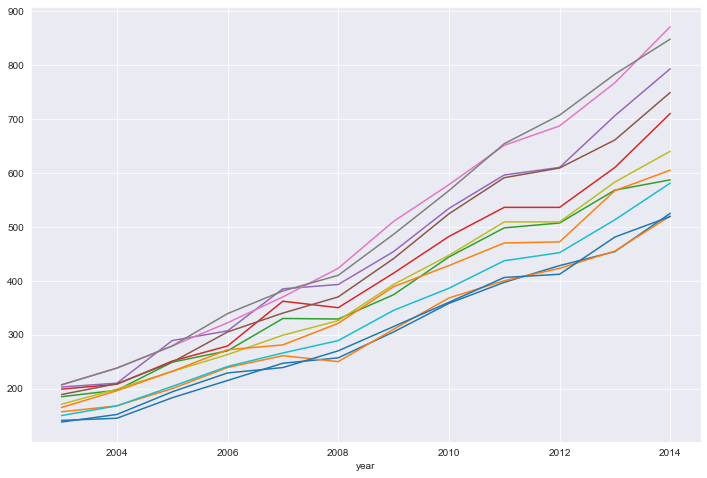

In [150]:
#Long to wide data
pd.pivot_table(data = sales, index = 'year', columns = 'month', values = 'No_of_Tractors_Sold').plot(legend=False, figsize = (12,8))

# Checking the seasonality in the Time series data.

In [151]:
pd.pivot_table(data = sales, index = 'month', columns = 'year', values = 'No_of_Tractors_Sold')

year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
month,,,,,,,,,,,,
1,141,145,183,215,247,257,305,358,397,428,454,525
2,157,168,200,239,261,250,310,368,400,423,455,520
3,185,197,249,270,330,329,374,444,498,507,568,587
4,199,208,251,279,362,350,414,482,536,536,610,710
5,203,210,289,307,385,393,454,534,596,610,706,793
6,189,209,249,305,340,370,441,524,591,609,661,749
7,207,238,279,322,370,423,510,578,651,687,767,871
8,207,238,279,339,381,410,486,567,654,707,783,848
9,171,199,232,263,299,326,393,447,509,509,583,640


<AxesSubplot:xlabel='month'>

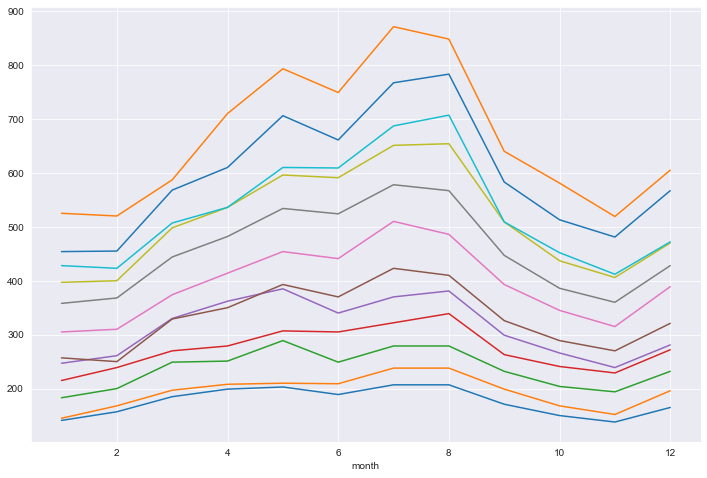

In [152]:
pd.pivot_table(data = sales, index = 'month', columns = 'year', values = 'No_of_Tractors_Sold').plot(legend=False, figsize = (12,8))

# Using the Decomposition of Time Series data to work on the Seasonality of data.

In [153]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [154]:
#We will be using the multiplicative model since we have both trend and seasonality in the data.

In [155]:
decom = seasonal_decompose(Tractors, model='multiplicative')

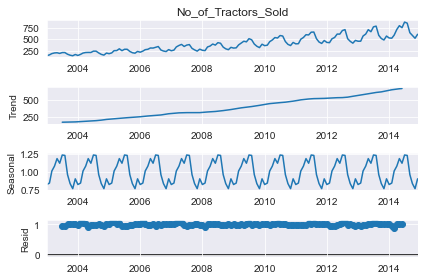

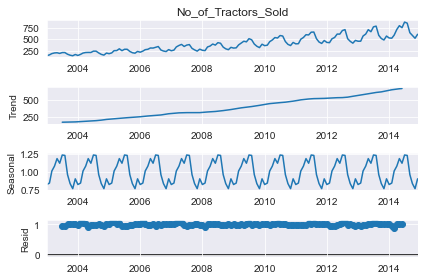

In [156]:
decom.plot()

In [157]:
decom.seasonal

Month_Year
2003-01-01    0.823333
2003-02-01    0.843859
2003-03-01    1.012370
2003-04-01    1.080556
2003-05-01    1.185793
                ...   
2014-08-01    1.230135
2014-09-01    0.961964
2014-10-01    0.836410
2014-11-01    0.765533
2014-12-01    0.903109
Name: seasonal, Length: 144, dtype: float64

In [158]:
decomposed = pd.concat([decom.observed, decom.trend, decom.seasonal, decom.resid], axis=1).head(24)
decomposed.columns = ['Actual', 'Trend', 'Seasonality', 'Irregular']
decomposed

,Actual,Trend,Seasonality,Irregular
Month_Year,,,,
2003-01-01,141.0,NaN,0.823333,NaN
2003-02-01,157.0,NaN,0.843859,NaN
2003-03-01,185.0,NaN,1.012370,NaN
2003-04-01,199.0,NaN,1.080556,NaN
2003-05-01,203.0,NaN,1.185793,NaN
2003-06-01,189.0,NaN,1.120913,NaN
2003-07-01,207.0,176.166667,1.236024,0.950648
2003-08-01,207.0,176.791667,1.230135,0.951822
2003-09-01,171.0,177.750000,0.961964,1.000064


# Seasonal-Trend decomposition using LOESS (STL):

In [159]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
sns.set_style("darkgrid")
plt.rc("figure", figsize=(16, 12))
plt.rc("font", size=13)

In [160]:
sales.describe()

,No_of_Tractors_Sold,year,month
count,144.000000,144.000000,144.000000
mean,389.694444,2008.500000,6.500000
std,171.500016,3.464102,3.464102
min,138.000000,2003.000000,1.000000
25%,248.500000,2005.750000,3.750000
50%,369.000000,2008.500000,6.500000
75%,509.250000,2011.250000,9.250000
max,871.000000,2014.000000,12.000000


In [161]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 2003-01-01 to 2014-12-01
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Month_Year           144 non-null    datetime64[ns]
 1   No_of_Tractors_Sold  144 non-null    int64         
 2   year                 144 non-null    int64         
 3   month                144 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 5.6 KB


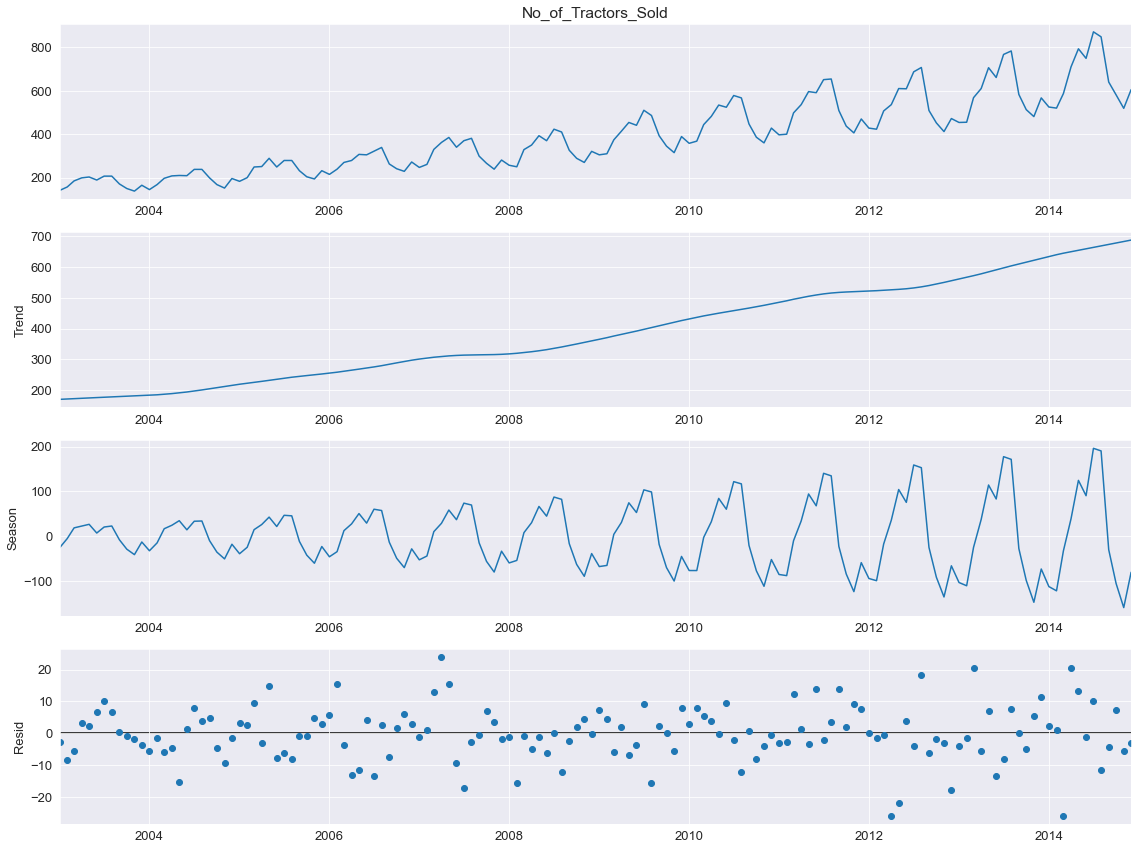

In [162]:
from statsmodels.tsa.seasonal import STL

stl = STL(Tractors, seasonal=13)
res = stl.fit()
fig = res.plot()

# TRAIN-TEST SPLIT:

In [163]:
sales.No_of_Tractors_Sold

Month_Year
2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Name: No_of_Tractors_Sold, Length: 144, dtype: int64

In [164]:
train = sales.No_of_Tractors_Sold[:'2014-06-01']
train

Month_Year
2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-02-01    520
2014-03-01    587
2014-04-01    710
2014-05-01    793
2014-06-01    749
Name: No_of_Tractors_Sold, Length: 138, dtype: int64

In [165]:
test = sales.No_of_Tractors_Sold['2014-07-01':]
test

Month_Year
2014-07-01    871
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Name: No_of_Tractors_Sold, dtype: int64

In [166]:
decom_train = seasonal_decompose(train, period = 12)

In [167]:
decom_train.observed

Month_Year
2003-01-01    141.0
2003-02-01    157.0
2003-03-01    185.0
2003-04-01    199.0
2003-05-01    203.0
              ...  
2014-02-01    520.0
2014-03-01    587.0
2014-04-01    710.0
2014-05-01    793.0
2014-06-01    749.0
Name: No_of_Tractors_Sold, Length: 138, dtype: float64

In [168]:
decom_train.seasonal

Month_Year
2003-01-01   -64.874179
2003-02-01   -61.107513
2003-03-01     3.975821
2003-04-01    26.946654
2003-05-01    69.604987
                ...    
2014-02-01   -61.107513
2014-03-01     3.975821
2014-04-01    26.946654
2014-05-01    69.604987
2014-06-01    48.000821
Name: seasonal, Length: 138, dtype: float64

# ETS MODEL: ExponenTial Smoothening

In [169]:
train

Month_Year
2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-02-01    520
2014-03-01    587
2014-04-01    710
2014-05-01    793
2014-06-01    749
Name: No_of_Tractors_Sold, Length: 138, dtype: int64

In [170]:
#ETS models
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [171]:
ets_model = ExponentialSmoothing(train, 
                                 trend='mul', 
                                 seasonal='mul', 
                                 seasonal_periods=12).fit(smoothing_level=0.1,     # alpha
                                                          smoothing_slope=0.6,     # beta
                                                          smoothing_seasonal=0.2   # gamma
                                                         )

E:\PYTHON SETUP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
E:\PYTHON SETUP\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [172]:
ets_model.forecast(6)

2014-07-01    853.495734
2014-08-01    848.824464
2014-09-01    643.528677
2014-10-01    558.915389
2014-11-01    512.691515
2014-12-01    599.839902
Freq: MS, dtype: float64

In [173]:
test

Month_Year
2014-07-01    871
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Name: No_of_Tractors_Sold, dtype: int64

In [174]:
np.abs(test.values - ets_model.forecast(6).values)/test.values

array([0.02009675, 0.00097225, 0.00551356, 0.03801138, 0.01215508,
       0.00852909])

In [175]:
np.mean(np.abs(test.values - ets_model.forecast(6).values)/test.values)

0.0142130156508175

***1.4% of Mean Absolute Percentage Error (MAPE) is permissible.***

# We can also use ARIMA Model as well to check the accuracy of the model.

In [176]:
from statsmodels.tsa.stattools import acf, pacf_ols

In [177]:
train

Month_Year
2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-02-01    520
2014-03-01    587
2014-04-01    710
2014-05-01    793
2014-06-01    749
Name: No_of_Tractors_Sold, Length: 138, dtype: int64

In [178]:
#Auto-Correlation Factor
acf(train)

array([1.        , 0.91870265, 0.81491787, 0.72609553, 0.65933991,
       0.60140863, 0.54973409, 0.5761664 , 0.62804007, 0.68000877,
       0.72240191, 0.74581711, 0.75669581, 0.68843804, 0.59821277,
       0.52097351, 0.45505165, 0.40272487, 0.35711132, 0.38138488,
       0.42806933, 0.47150164])

In [179]:
len(acf(train))

22

In [180]:
train

Month_Year
2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-02-01    520
2014-03-01    587
2014-04-01    710
2014-05-01    793
2014-06-01    749
Name: No_of_Tractors_Sold, Length: 138, dtype: int64

In [181]:
acf(train)[:5]

array([1.        , 0.91870265, 0.81491787, 0.72609553, 0.65933991])

In [182]:
import statsmodels.tsa.api as smt

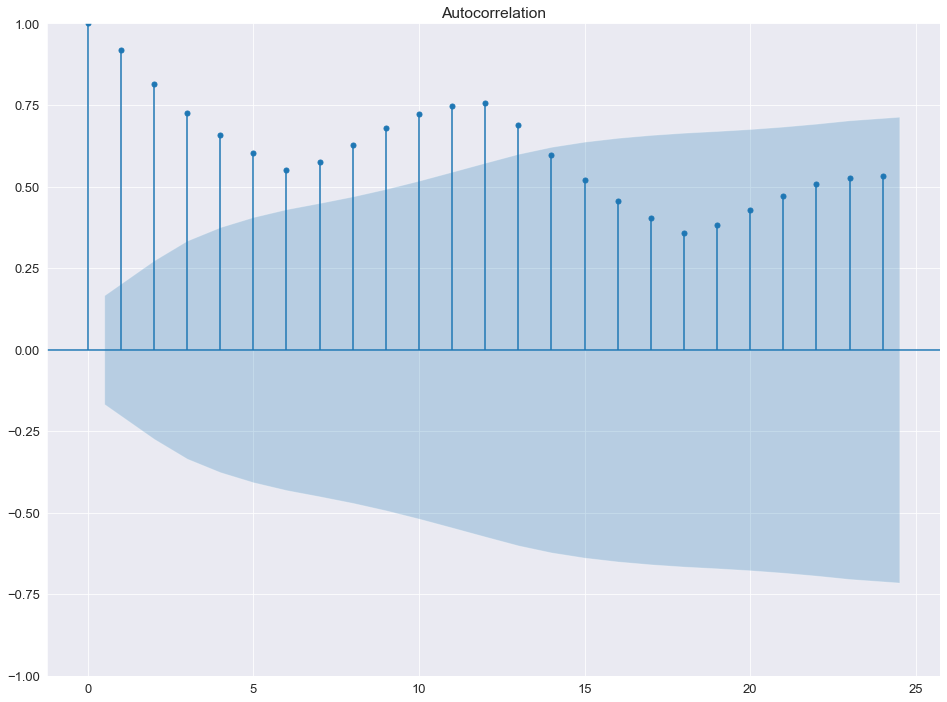

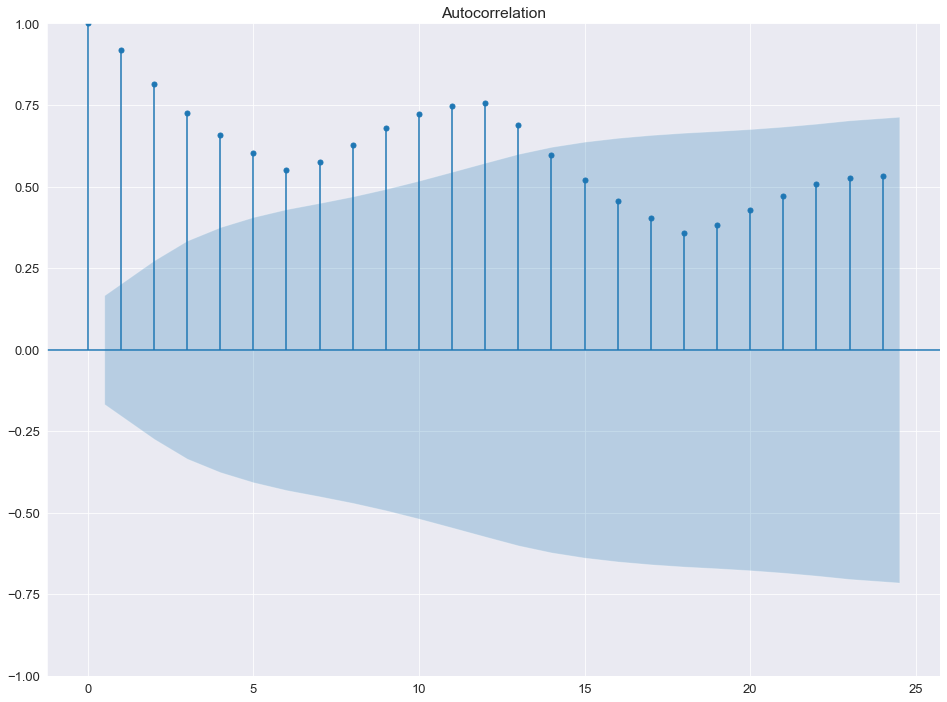

In [183]:
smt.graphics.plot_acf(train, lags = 24)

# Augmented Dickey Fuller Test.

***Null hypothesis: Time Series data is not stationary.***
    
***Alternate hypothesis : Time Series data is stationary.***
    
***Confidence interval : 95%***
    
***p-value : 0.05***

In [184]:
# Dickey-Fuller test can also help with finding whther my series is stationary of not
from statsmodels.tsa.stattools import adfuller
adfuller(train)

(1.2739486922187953,
 0.9964590141834325,
 14,
 123,
 {'1%': -3.4846672514209773,
  '5%': -2.8853397507076006,
  '10%': -2.5794629869786503},
 1033.1926397569034)

**p value is very high 0.99 means we cannot reject the null hypothesis - Time Series is NOT stationary.**

**Given p value here is 0.99 it means that our series is not stationary.**

**We would perform log transformation :**

In [185]:
train_ln = np.log(train)
adfuller(train_ln)

(-1.4767951635744399,
 0.544957623892465,
 13,
 124,
 {'1%': -3.484219653271961,
  '5%': -2.885145235641637,
  '10%': -2.579359138917794},
 -422.3456315453674)

**Again, p-value is 0.544 >> 0.05, we cannot reject the null hypothesis - hence data is not stationary.**

In [186]:
train_diff = train.diff().dropna()
adfuller(train_diff)

(-2.914420701553803,
 0.04369658167226486,
 13,
 123,
 {'1%': -3.4846672514209773,
  '5%': -2.8853397507076006,
  '10%': -2.5794629869786503},
 1033.0442612327795)

In [187]:
train_log_diff = np.log(train).diff().dropna()
adfuller(train_log_diff)

(-3.0686551381937095,
 0.028961500046775755,
 12,
 124,
 {'1%': -3.484219653271961,
  '5%': -2.885145235641637,
  '10%': -2.579359138917794},
 -421.77766017801935)

**p-value = 0.028 <<< 0.05, now we can reject the null hypothesis.**

In [188]:
train

Month_Year
2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-02-01    520
2014-03-01    587
2014-04-01    710
2014-05-01    793
2014-06-01    749
Name: No_of_Tractors_Sold, Length: 138, dtype: int64

In [189]:
np.log(train)

Month_Year
2003-01-01    4.948760
2003-02-01    5.056246
2003-03-01    5.220356
2003-04-01    5.293305
2003-05-01    5.313206
                ...   
2014-02-01    6.253829
2014-03-01    6.375025
2014-04-01    6.565265
2014-05-01    6.675823
2014-06-01    6.618739
Name: No_of_Tractors_Sold, Length: 138, dtype: float64

In [190]:
train_log_diff

Month_Year
2003-02-01    0.107486
2003-03-01    0.164110
2003-04-01    0.072949
2003-05-01    0.019901
2003-06-01   -0.071459
                ...   
2014-02-01   -0.009569
2014-03-01    0.121196
2014-04-01    0.190240
2014-05-01    0.110558
2014-06-01   -0.057084
Name: No_of_Tractors_Sold, Length: 137, dtype: float64

In [191]:
stationary_series = train_log_diff

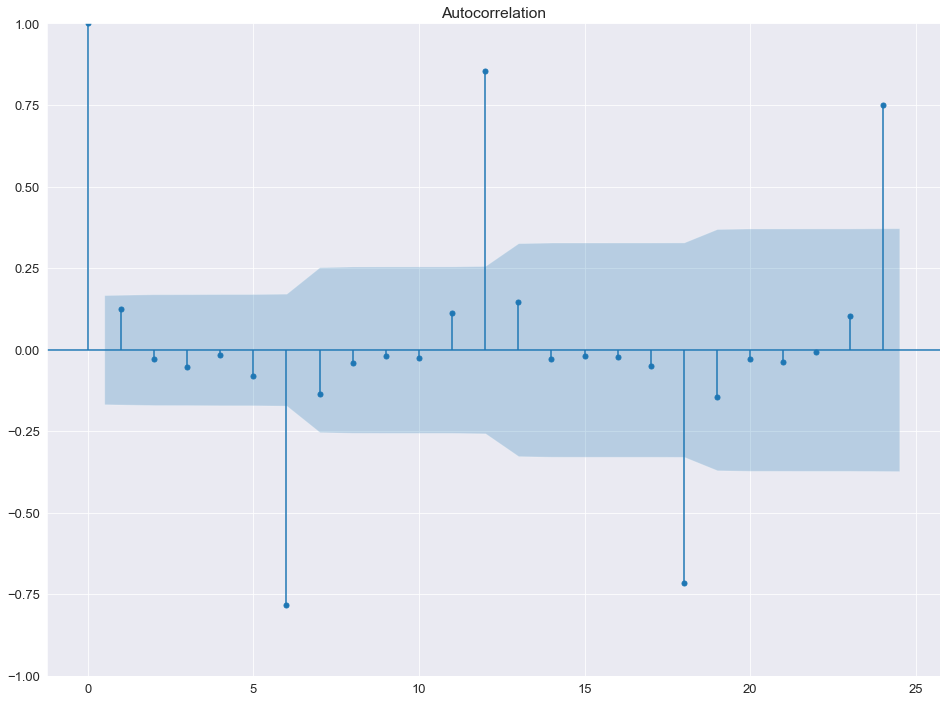

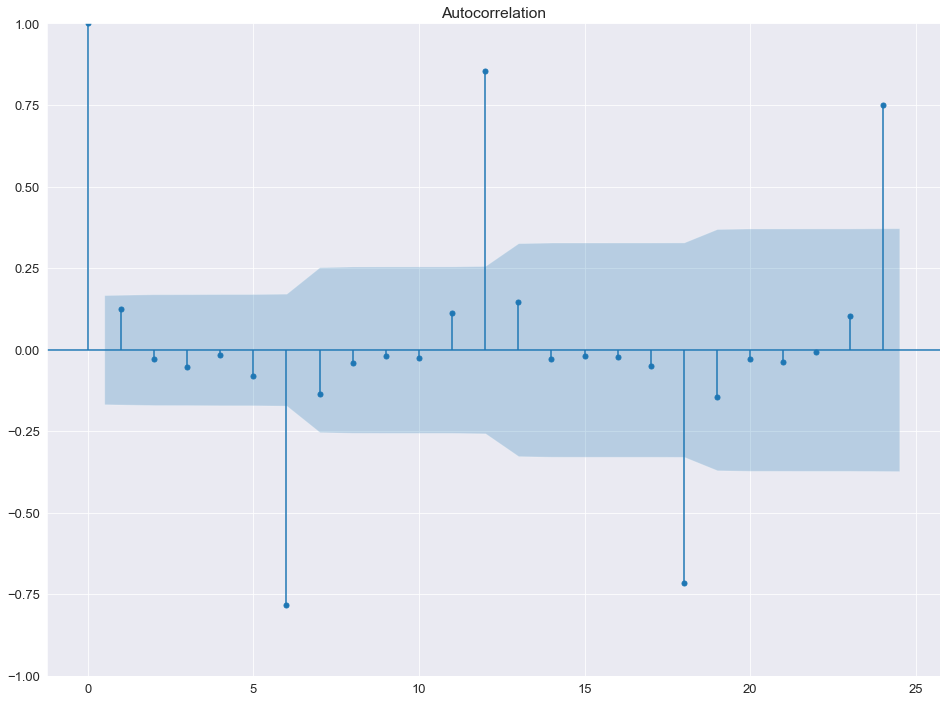

In [192]:
smt.graphics.plot_acf(stationary_series, lags = 24)

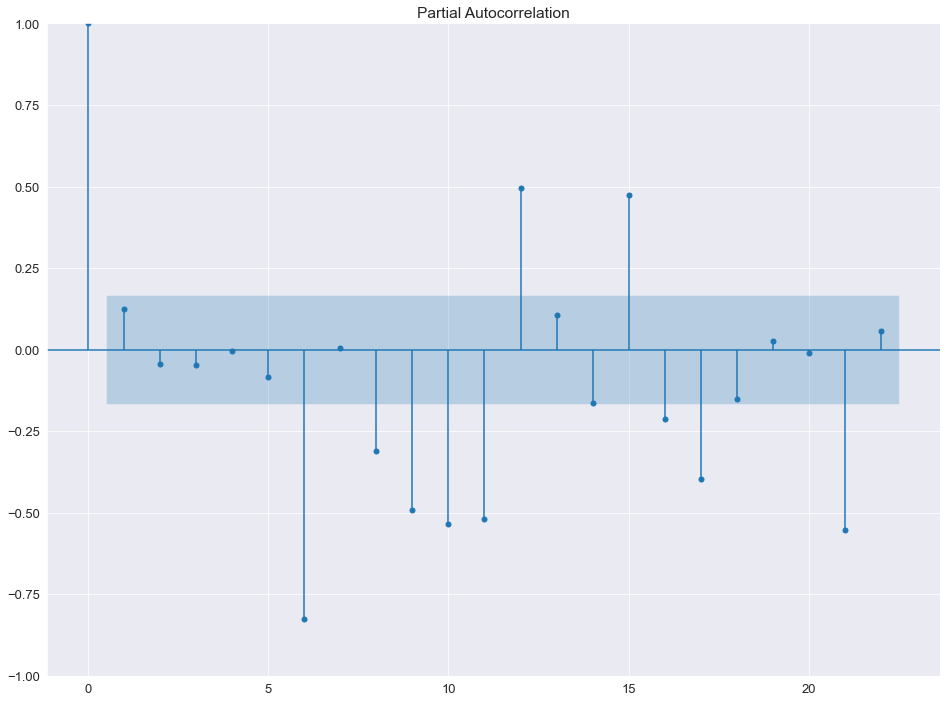

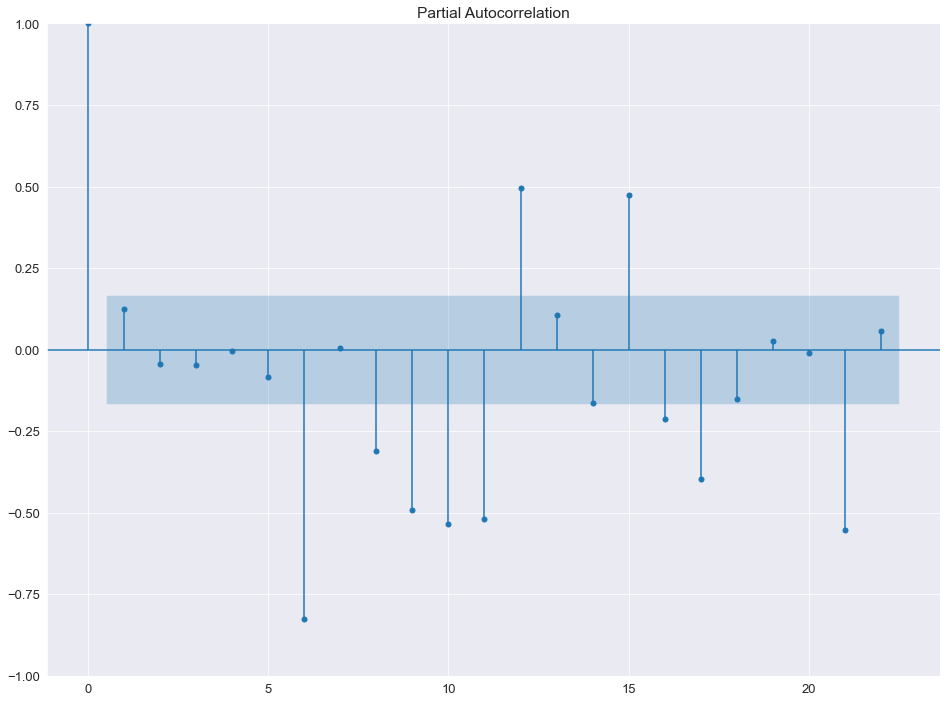

In [193]:
smt.graphics.plot_pacf(stationary_series)

In [194]:
# value of d = 1
# value of p and value of q = 1
# seasonal component = 12

In [195]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(stationary_series, order = (1,1,1), seasonal_order= (1,0,1,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False).fit()

E:\PYTHON SETUP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
E:\PYTHON SETUP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [196]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                No_of_Tractors_Sold   No. Observations:                  137
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 222.077
Date:                            Wed, 09 Nov 2022   AIC                           -434.155
Time:                                    16:00:50   BIC                           -420.134
Sample:                                02-01-2003   HQIC                          -428.460
                                     - 06-01-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3577      0.075     -4.763      0.000      -0.505      -0.211
ma.L1         -1.0000     83.745   

In [200]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.forecasting.stl import STLForecast


stlf = STLForecast(train, ARIMA, model_kwargs={"order": (1, 1, 1)})
res = stlf.fit()
forecasts = res.forecast(12)

E:\PYTHON SETUP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
E:\PYTHON SETUP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
E:\PYTHON SETUP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [201]:
forecasts

2014-07-01    835.565313
2014-08-01    855.359688
2014-09-01    639.360258
2014-10-01    566.759566
2014-11-01    524.429634
2014-12-01    595.418875
2015-01-01    554.335389
2015-02-01    544.404805
2015-03-01    624.276489
2015-04-01    710.196614
2015-05-01    796.441592
2015-06-01    746.643801
Freq: MS, dtype: float64

E:\PYTHON SETUP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
E:\PYTHON SETUP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
E:\PYTHON SETUP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


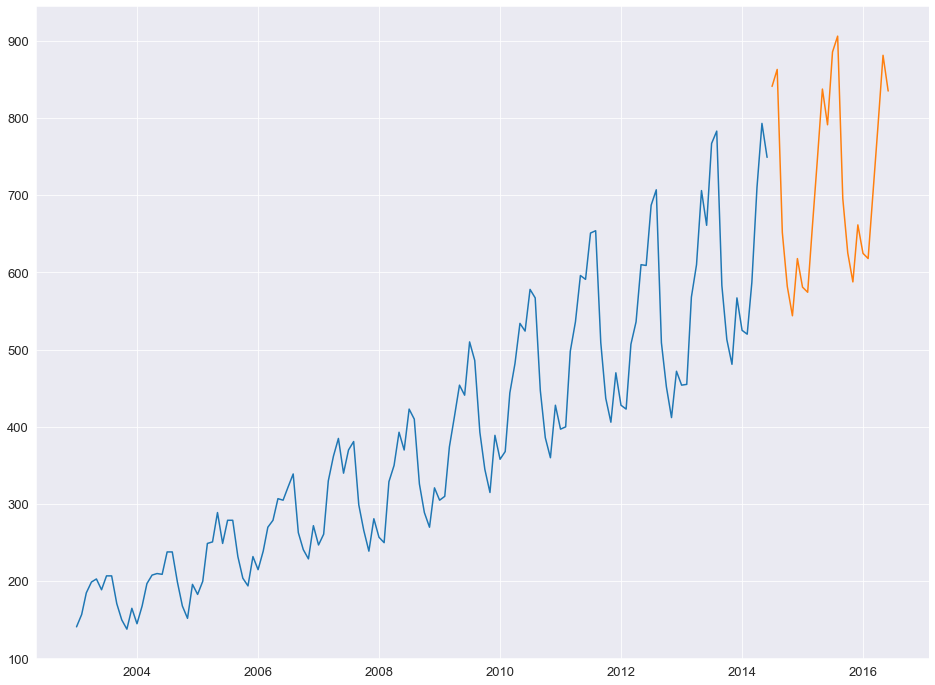

In [202]:
stlf = STLForecast(train, ARIMA, model_kwargs=dict(order=(1, 1, 1), trend="t"))
stlf_res = stlf.fit()

forecast = stlf_res.forecast(24)
plt.plot(train)
plt.plot(forecast)
plt.show()